# Importing Pandas

In [5]:
import pandas as pd
import numpy as np

# Creating new DataFrames - Dictionary

In [2]:
data={'student': ['João','José','Maria','Ana'], 'year':[1,2,3,1], 'marks':[9.8,6.7,8,9.9]}
dataflair_df=pd.DataFrame(data)
dataflair_df


,student,year,marks
0,João,1,9.8
1,José,2,6.7
2,Maria,3,8.0
3,Ana,1,9.9


In [7]:
mean = dataflair_df['marks'].mean()
#notas = np.array(dataflair_df['marks'])
#media_notas = np.mean(notas)
#print(media_notas)

8.6


# Reading csv from URL 

In [8]:
url = ('https://raw.github.com/pandas-dev'
...: '/pandas/master/pandas/tests/io/data/csv/tips.csv')



In [9]:
tips = pd.read_csv(url)

In [10]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [13]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Type - DataFrame / Series

In [121]:
type(tips)

pandas.core.frame.DataFrame

In [123]:
type(tips["smoker"])

pandas.core.series.Series

   # Creating New DataFrames 
       # Two examples 

In [124]:
df2 = tips[['sex','day']]
df2

,sex,day
0,Female,Sun
1,Male,Sun
2,Male,Sun
3,Male,Sun
4,Female,Sun
...,...,...
239,Male,Sat
240,Female,Sat
241,Male,Sat
242,Male,Sat


In [126]:
df3 = tips.sex
df3

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: object

In [127]:
tips.loc[0:1,'sex']

0    Female
1      Male
Name: sex, dtype: object

In [128]:
tips.loc[3,'size']

2

In [129]:
tips.iloc[4,0]

24.59

In [130]:
tips.iloc[4,2:5]

sex       Female
smoker        No
day          Sun
Name: 4, dtype: object

In [131]:
tips[['total_bill', 'tip', 'smoker', 'time']].head(5)

,total_bill,tip,smoker,time
0,16.99,1.01,No,Dinner
1,10.34,1.66,No,Dinner
2,21.01,3.50,No,Dinner
3,23.68,3.31,No,Dinner
4,24.59,3.61,No,Dinner


In [132]:
tips[tips['time'] == 'Dinner'].head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [134]:
tips_by_sex = tips.groupby('sex').size()
tips_by_sex

sex
Female     87
Male      157
dtype: int64

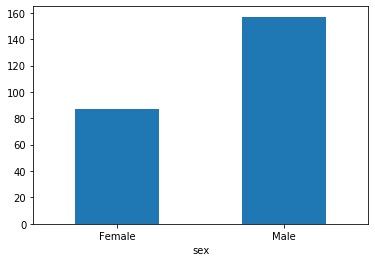

In [135]:
tips_by_sex.plot.bar(rot=0);

In [20]:
tips_1 = tips.groupby('day').agg({'total_bill': np.max})
tips_1

,total_bill
day,
Fri,40.17
Sat,50.81
Sun,48.17
Thur,43.11


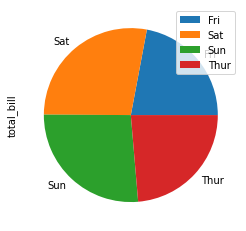

In [21]:
tips_1.plot.pie(y='total_bill');

In [14]:
df1 = pd.DataFrame({'city': ['Chicago', 'San Francisco', 'New York City'], 'rank': range(1, 4)})
df2 = pd.DataFrame({'city': ['Chicago', 'Boston', 'Los Angeles'], 'rank': [1, 4, 5]})

In [15]:
df1.head()

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3


In [16]:
df2.head()

,city,rank
0,Chicago,1
1,Boston,4
2,Los Angeles,5


In [17]:
pd.concat([df1, df2])

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
0,Chicago,1
1,Boston,4
2,Los Angeles,5


In [27]:
DataFrame = pd.concat([df1, df2]).drop_duplicates()
DataFrame

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
1,Boston,4
2,Los Angeles,5


In [28]:
DataFrame.reset_index(inplace = True)
DataFrame


,index,city,rank
0,0,Chicago,1
1,1,San Francisco,2
2,2,New York City,3
3,1,Boston,4
4,2,Los Angeles,5


In [ ]:
tips.to_csv('tips2.csv')    